# What Will Get Me the Best Annual Percentage Rate (APR) on My Loan?
## by Tyler Amburgey

## Preliminary Wrangling

> This dataset includes a plethora of variables describing loans from Prosper Loans. From homeownership to the type of loan you request, all of these factors have an impact on your APR, and I want to see which combination might get you the lowest APR, the best deal on your loan.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
#load in data
loan_df = pd.read_csv('prosperLoanData.csv')

In [4]:
#take a look at the shape of the data
loan_df.shape

(113937, 81)

In [5]:
#investigate the data types and number of rows per variable
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
#Take a quick view of the data in its format
loan_df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?

> This dataset contains many different variables that describe loans. There are 81 variables in total and 113,937 loans in total. Although, many loans are missing data for certain variables. For example, the loans created prior to 2009 are missing credit grade data, and only those after 2009 have data for some variables. I will clean the data, to only make use of features of interest and to drop the null values.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest that I wish to investigate are those that don't pertain to  a credit score, such as income and the amount of the loan itself, among others, in order to see what combination of different factors will get you the lowest APR.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> One would assume that the variables that pertain to credit score ratings would be the best predictor of full loan repayment. However, I'm interested in seeing how much this really impacts the repayment of the loan, and if there are other factors that are just telling as the credit score information. I believe the amount of the loan and its duration, as well as monthly income will have a big impact on whether a borrower can get a low APR.

In [7]:
#Make a copy of the data
loan_df_clean = loan_df.copy()

In [8]:
#Select variables of interest
loan_data = loan_df_clean[['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MonthlyLoanPayment']]

In [9]:
#Drop null values from dataset
loan_data = loan_data.dropna()

In [10]:
#Create credit score range variable
loan_data[['CreditScoreRangeLower', 'CreditScoreRangeUpper']] = loan_data[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].astype('str').replace('\.0', '', regex = True)

In [11]:
loan_data['CreditScoreRange'] = loan_data['CreditScoreRange'] = loan_data['CreditScoreRangeLower'].str.cat(loan_data['CreditScoreRangeUpper'],sep="-")

In [12]:
#Drop not employed from income range, since there is only one instance of this
i = loan_data[loan_data['IncomeRange'] == 'Not employed'].index
loan_data.drop(i, inplace = True)

In [13]:
#Update data types
loan_data['Term'] = loan_data['Term'].astype('str')
loan_data['LoanStatus'] = loan_data['LoanStatus'].astype('category')
loan_data['ProsperRating (numeric)'] = loan_data['ProsperRating (numeric)'].astype('str')
loan_data['ProsperRating (Alpha)'] = loan_data['ProsperRating (Alpha)'].astype('str')
loan_data['Term'] = loan_data['Term'].astype('str')
loan_data['ProsperScore'] = loan_data['ProsperScore'].astype('str')
loan_data['IncomeRange'] = loan_data['IncomeRange'].astype('category')
loan_data['ListingCategory (numeric)'] = loan_data['ListingCategory (numeric)'].astype('category')
loan_data['FirstRecordedCreditLine'] = pd.to_datetime(loan_data['FirstRecordedCreditLine'])
loan_data['CurrentCreditLines'] = loan_data['CurrentCreditLines'].astype('int')
loan_data['OpenCreditLines'] = loan_data['OpenCreditLines'].astype('int')
loan_data['TotalCreditLinespast7years'] = loan_data['TotalCreditLinespast7years'].astype('int')
loan_data['InquiriesLast6Months'] = loan_data['InquiriesLast6Months'].astype('int')
loan_data['TotalInquiries'] = loan_data['TotalInquiries'].astype('int')
loan_data['LoanOriginationDate'] = pd.to_datetime(loan_data['LoanOriginationDate'])
loan_data['CreditScoreRange'] = loan_data['CreditScoreRange'].astype('category')

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

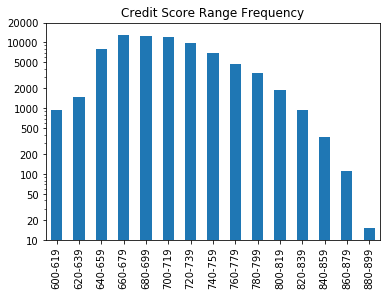

In [14]:
loan_data['CreditScoreRange'].value_counts().sort_index().plot(kind = 'bar');
plt.yscale('log');
yticks_creditscore = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000]
plt.yticks(yticks_creditscore, yticks_creditscore);
plt.title('Credit Score Range Frequency');

When using a logistic transformation, we can see something that slighlty resembles a normal distribution among the credit score ranges. This is as expected, most of the borrowers have average credit scores, and there are few that have very high credit scores, although it is interesting that there are many that have relatively low scores. There are certainly more borrowers below the average score than above. This lender isn't overly concerned with credit scores it seems. 

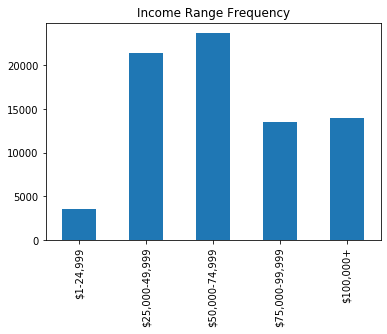

In [15]:
loan_data['IncomeRange'].value_counts().loc[['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']].plot(kind = 'bar');
plt.title('Income Range Frequency');

Here we can see a somewhat normal distribution again. Although, it is definitely right-skewed. However, this is to be expected. It is likely that borrowers make a lower income, because they need to prove they are capable of repaying the loan. The majority of this lender's borrowers seem to be earning a considerable income.

In [19]:
counts = loan_data['IsBorrowerHomeowner'].value_counts()

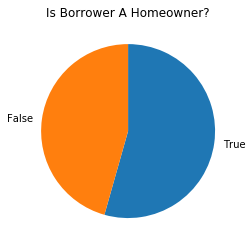

In [21]:
plt.pie(counts, labels = counts.index, startangle = 90, counterclock = False);
plt.title('Is Borrower A Homeowner?');

As is also expected, most borrowers are homeowners. This doesn't come as a surprise, but I want to see if this impacts the APR a borrower receives.

In [22]:
#Create top 10 occupations
Top10_Occupation = loan_data['Occupation'].value_counts().sort_values(ascending = False)[:10]

In [23]:
#Create bottom 10 occupations
Bottom10_Occupation = loan_data['Occupation'].value_counts().sort_values()[:10]

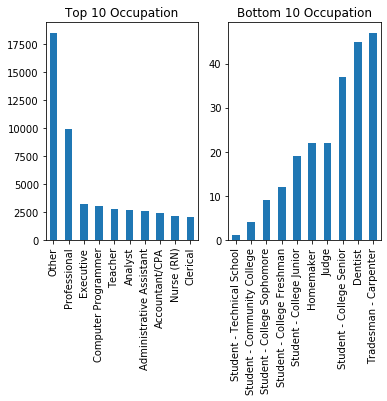

In [24]:
plt.subplot(1,2,1)
Top10_Occupation.plot(kind = 'bar');
plt.title('Top 10 Occupation');

plt.subplot(1,2,2)
Bottom10_Occupation.plot(kind = 'bar');
plt.title('Bottom 10 Occupation');

This plot also makes sense in this context, because the most frequent occupations are professional, executive, and other well-earning positions. However, since other is by far the most frequent occupation listed, this information isn't very useful, because it isn't detailed enough, so I will not be looking into this further. However, I do believe this could be interesting if there were to be more detail. If, for example, two borrowers earned the same amount but had different occupations, is there some sort of bias among lenders towards a certain occupation over another.

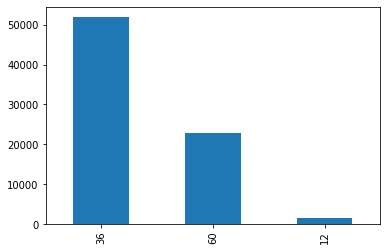

In [25]:
loan_data['Term'].value_counts().plot(kind = 'bar');

We can see here that the mid-length term is the most popular. I will investigate this further to see how much of an impact this has on APR. Will this have an impact of APR?

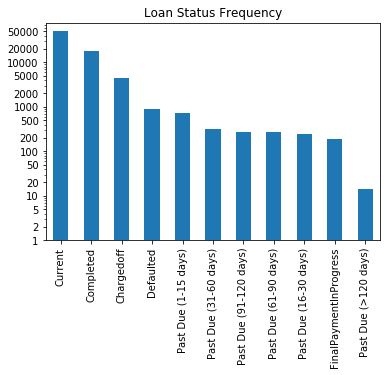

In [26]:
loan_data['LoanStatus'].value_counts().plot(kind = 'bar');
plt.yscale('log');
yticks_status = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000]
plt.yticks(yticks_status, yticks_status);
plt.title('Loan Status Frequency');

As expected, most loans are current or completed, but there are plenty of defaulted accounts. I want to see if credit score or income is a good predictor of this later on.

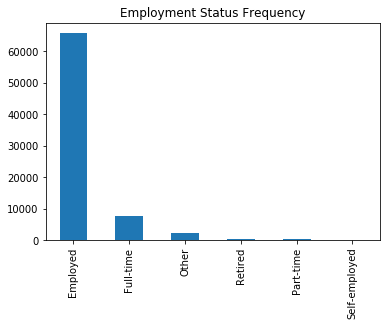

In [27]:
loan_data['EmploymentStatus'].value_counts().plot(kind = 'bar');
plt.title('Employment Status Frequency');

As is expected, we can see here that the vast majority of the borrowers are employed. However, this variable is confusing, since both employed and full-time are choices. This data isn't very helpful.

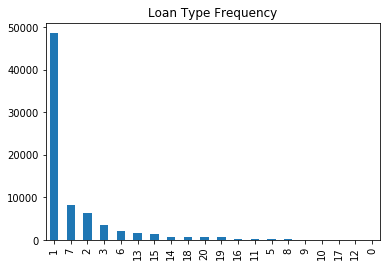

In [28]:
loan_data['ListingCategory (numeric)'].value_counts().sort_values(ascending = False).plot(kind = 'bar');
plt.title('Loan Type Frequency');

Here we can see, loan type 1, debt consolidation is by far the most popular loan here, followed by Other, Home Improvement, Business, and Auto. I will look into this further to see which loan type receives the best APR. Would a certain type of loan receive a better APR?

In [29]:
#Look at statistics to help create bins
loan_data['LoanOriginalAmount'].describe()

count    76215.000000
mean      9295.108246
std       6413.375954
min       1000.000000
25%       4000.000000
50%       8000.000000
75%      14606.500000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

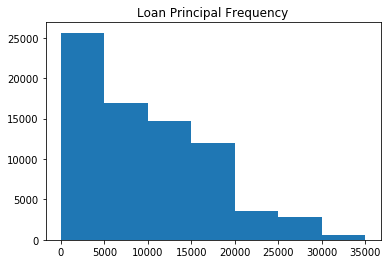

In [30]:
binsize = 5000
bins = np.arange(0, loan_data['LoanOriginalAmount'].max()+binsize, binsize)

plt.hist(data = loan_data, x = 'LoanOriginalAmount', bins = bins);
plt.title('Loan Principal Frequency');

This lender seems to specialize in smaller loans, since the largest bin is 5,000 dollars and below. The maximum amount they lend seems to be 35,000 dollars. Does loan amount impact the APR you receive?

In [31]:
#Drop monthly incomes over 50K since this is not representative of the rest of the dataset
Over50K = loan_data[loan_data['StatedMonthlyIncome'] > 50000].index
loan_data = loan_data.drop(Over50K)

In [32]:
#Look at statistics to help create bins
loan_data['StatedMonthlyIncome'].describe()

count    76176.000000
mean      5949.401235
std       3733.534276
min          0.250000
25%       3583.333333
50%       5033.333333
75%       7244.645833
max      50000.000000
Name: StatedMonthlyIncome, dtype: float64

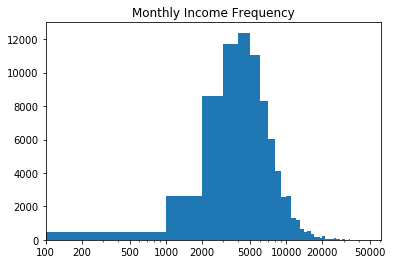

In [33]:
binsize = 1000
bins = np.arange(0, loan_data['StatedMonthlyIncome'].max()+binsize, binsize)

plt.hist(data = loan_data, x = 'StatedMonthlyIncome', bins = bins);
plt.xscale('log')
xticks_inc = (100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000)
plt.xticks(xticks_inc, xticks_inc);
plt.title('Monthly Income Frequency');

It looks like there is a clear average monthly income, but there is a long tail on the left side. This is probably due to the student use loans, because students won't have much income at the time, or something similar. I've removed the monthly incomes over 50,000 dollars, because this made up only a very small part of the dataset and skewed it a good amount, since this obviously an outlier when it comes to monthly income. These aren't your normal borrowers. Could earning more money get you a lower APR?

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I want to investigate variables that aren't directly included as part of a credit score. In the distributions here, we can see that the majority of people receiving loans here make a good amount of money over 50,000 dollars. It's also interesting that most of the loans are a smaller amount and are mostly for debt consolidation. Although, most of the people receiving loans still have good credit scores. I find it interesting, if these people are mostly all employed, earn good incomes, and have decent credit scores, that they need to debt consolidation loans. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were a couple interesting distributions with long tails that benefited from using a log x-scale. These were the credit score ranges and loan status distributions. These transformations made the distributions easier to read, especially at these lower numbers.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [34]:
#Create credit score mean from the upper and lower credit score range variables so it can be used quantitatively
loan_data['CreditScoreRangeLower'] = loan_data['CreditScoreRangeLower'].astype('float')
loan_data['CreditScoreRangeUpper'] = loan_data['CreditScoreRangeUpper'].astype('float')

In [35]:
#Take average
loan_data['CreditScoreMean'] = (loan_data['CreditScoreRangeUpper'] + loan_data['CreditScoreRangeLower'])/2

In [36]:
#Make integer to drop decimal
loan_data['CreditScoreMean'] = loan_data['CreditScoreMean'].astype('int')

In [37]:
#Select quantitative variables of interest
numeric_vars = ['LoanOriginalAmount', 'DebtToIncomeRatio', 'BorrowerAPR', 'StatedMonthlyIncome', 'EmploymentStatusDuration', 'CurrentCreditLines', 'TotalInquiries', 'BankcardUtilization', 'CreditScoreMean']

In [38]:
#Take sample of data so plots are more clear
loan_samp = loan_data.sample(500)

In [39]:
#Investigate debt to income ratio to find outliers
loan_samp['DebtToIncomeRatio'].describe()

count    500.000000
mean       0.247780
std        0.176249
min        0.030000
25%        0.150000
50%        0.220000
75%        0.310000
max        2.720000
Name: DebtToIncomeRatio, dtype: float64

In [40]:
#Drop ratios above 5, because this is unusual
dii = loan_data[loan_data['DebtToIncomeRatio'] > 5].index

In [41]:
loan_data.drop(dii, inplace = True)

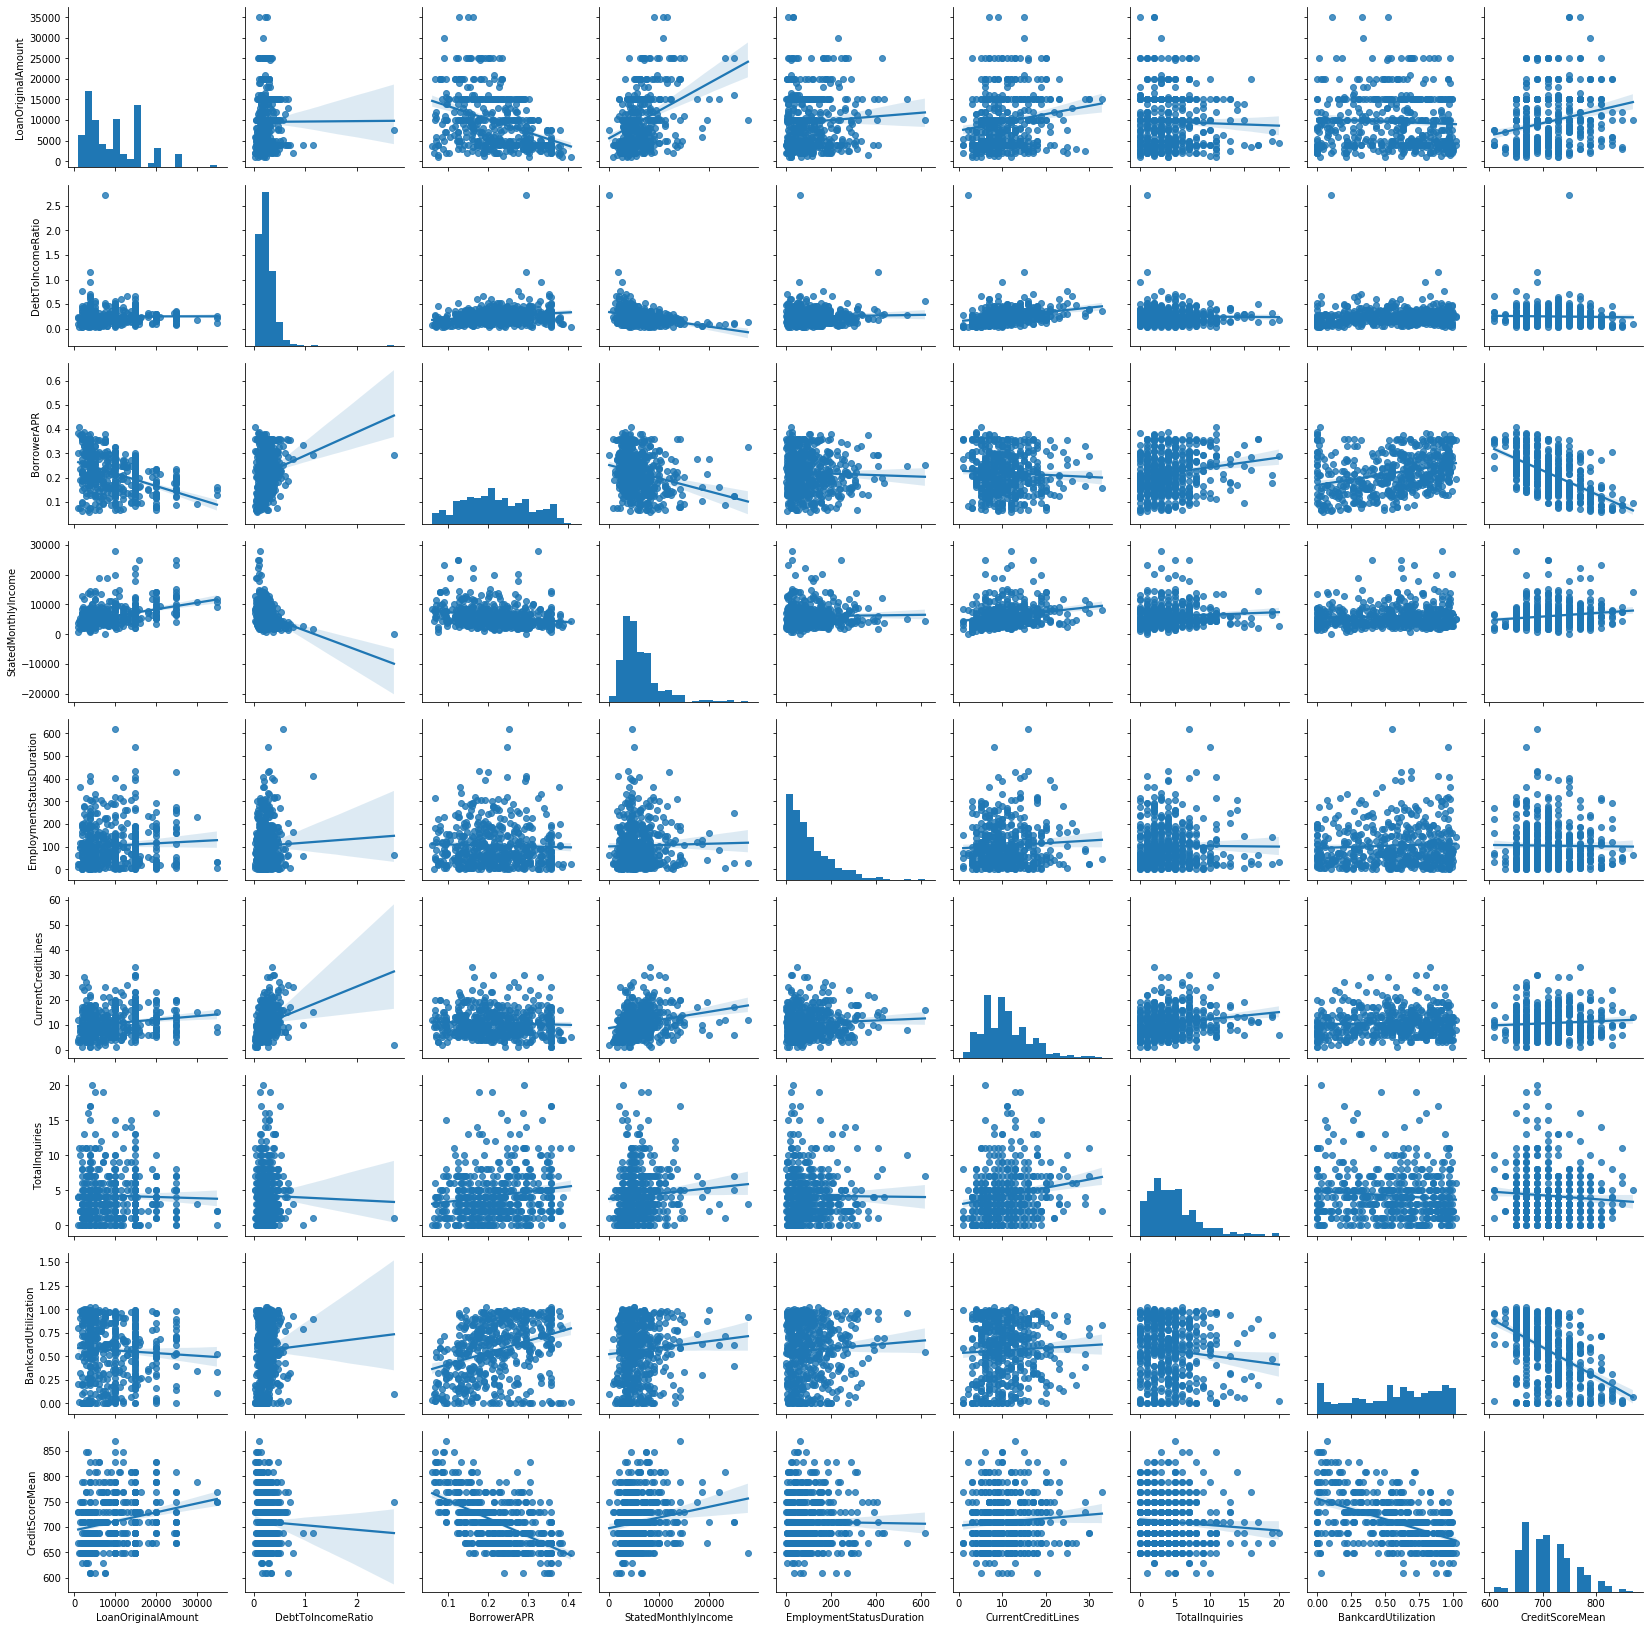

In [42]:
g = sb.PairGrid(data = loan_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(sb.regplot)

I can see a few interesting variables that impact APR that I want to look at. Mainly the stated monthly income and the loan principal, which are thing that don't factor directly into these credit scores. So, I will mainly be looking into these, since they aren't an obvious thing you would think about with APR, like you would a credit score.

In [43]:
#Select variables to inspect in the heatmap
interest_vars = ['StatedMonthlyIncome', 'LoanOriginalAmount', 'CurrentCreditLines', 'CreditScoreMean', 'BorrowerAPR', 'EmploymentStatusDuration', 'DebtToIncomeRatio']

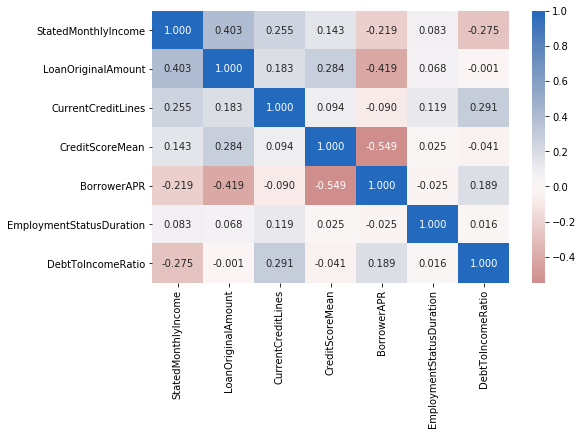

In [44]:
plt.figure(figsize = [8, 5])
sb.heatmap(loan_data[interest_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

Of the non-credit score, quantitative variables that have an impact on APR, stated monthly income and loan original amount are the most interesting. I want to look at these more, as well as other qualitative variables, in order to see which combination of factors will get me the best APR on a loan.

In [45]:
#Setting base color for the following graphs
base_color = sb.color_palette()[0]

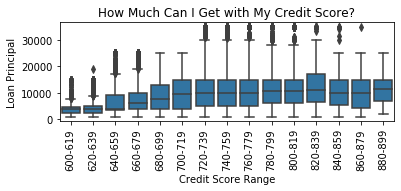

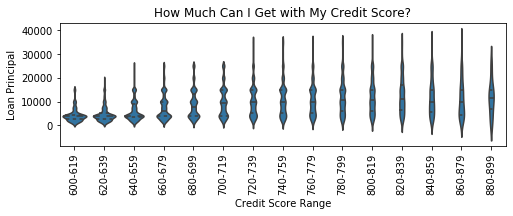

<Figure size 576x360 with 0 Axes>

In [46]:
plt.subplot(2,1,1)
sb.boxplot(data = loan_data, x = 'CreditScoreRange', y = 'LoanOriginalAmount', color = base_color);
plt.xticks(rotation = 90);
plt.xlabel('Credit Score Range')
plt.ylabel('Loan Principal')
plt.title('How Much Can I Get with My Credit Score?')
plt.figure(figsize = [8,5]);


plt.subplot(2,1,2)
sb.violinplot(data = loan_data, x = 'CreditScoreRange', y = 'LoanOriginalAmount', inner = 'quartile', color = base_color);
plt.xticks(rotation = 90);
plt.xlabel('Credit Score Range')
plt.ylabel('Loan Principal')
plt.title('How Much Can I Get with My Credit Score?')
plt.figure(figsize = [8,5]);

It's clear here that a lower credit score means you are likely to only get a smaller loan. However, some of the mid-range credit scores outstretch the highest of credit scores, and some of the points of the mid-range credit scores are far higher than that of the highest credit score. This most likely because not many borrowers have that high of a credit score and there isn't much data to go off of, but it's interesting nonetheless. This leads me to believe that income among other things are just as important as the credit score.

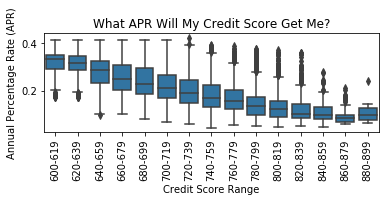

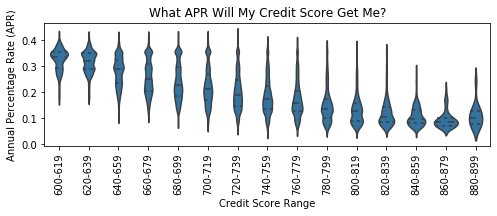

<Figure size 576x360 with 0 Axes>

In [47]:
plt.subplot(2,1,1)
sb.boxplot(data = loan_data, x = 'CreditScoreRange', y = 'BorrowerAPR', color = base_color);
plt.xticks(rotation = 90);
plt.xlabel('Credit Score Range')
plt.ylabel('Annual Percentage Rate (APR)')
plt.title('What APR Will My Credit Score Get Me?')
plt.figure(figsize = [8,5]);

plt.subplot(2,1,2)
sb.violinplot(data = loan_data, x = 'CreditScoreRange', y = 'BorrowerAPR', inner = 'quartile', color = base_color);
plt.xticks(rotation = 90);
plt.xlabel('Credit Score Range')
plt.ylabel('Annual Percentage Rate (APR)')
plt.title('What APR Will My Credit Score Get Me?')
plt.figure(figsize = [8,5]);

These plots are effectively the inverse of the loan principal plots above, because a lower APR is more desirable and harder to get, thus you need a good credit score. However, the mid ranges often reach as low as the higher credit scores, which means your credit score isn't going to completely cut you off from a certain APR, because the process is wholistic, meaning other things are considered separate from your credit score.

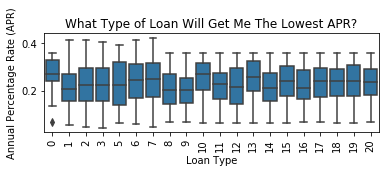

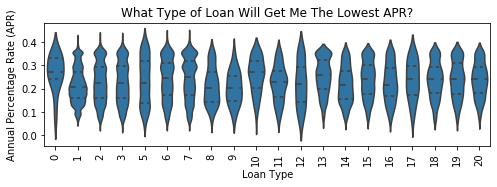

<Figure size 576x360 with 0 Axes>

In [48]:
plt.subplot(2,1,1)
sb.boxplot(data = loan_data, x = 'ListingCategory (numeric)', y = 'BorrowerAPR', color = base_color);
plt.xticks(rotation = 90);
plt.xlabel('Loan Type')
plt.ylabel('Annual Percentage Rate (APR)')
plt.title('What Type of Loan Will Get Me The Lowest APR?')
plt.figure(figsize = [8,5]);

plt.subplot(2,1,2)
sb.violinplot(data = loan_data, x = 'ListingCategory (numeric)', y = 'BorrowerAPR', inner = 'quartile', color = base_color);
plt.xticks(rotation = 90);
plt.xlabel('Loan Type')
plt.ylabel('Annual Percentage Rate (APR)')
plt.title('What Type of Loan Will Get Me The Lowest APR?')
plt.figure(figsize = [8,5]);

These plots show that certain loan types have better odds of getting a low APR than others. From these it looks like green loans have a decent distribution of a very low APR, which is interesting. This is probably because these loans are rarer and have certain stipulations, but if you wanted a loan with a low APR, this is a good one. These green loans are used for environmentally purposes, such as installing solar panels on your house.

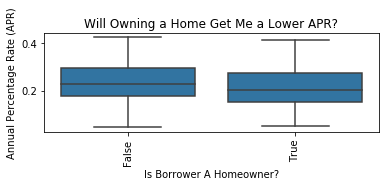

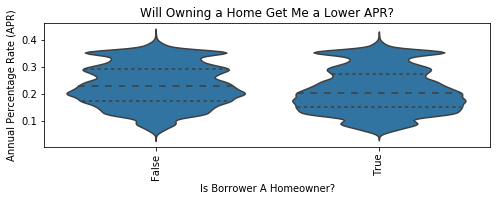

<Figure size 576x360 with 0 Axes>

In [49]:
plt.subplot(2,1,1)
sb.boxplot(data = loan_data, x = 'IsBorrowerHomeowner', y = 'BorrowerAPR', color = base_color);
plt.xticks(rotation = 90);
plt.xlabel('Is Borrower A Homeowner?')
plt.ylabel('Annual Percentage Rate (APR)')
plt.title('Will Owning a Home Get Me a Lower APR?')
plt.figure(figsize = [8,5]);

plt.subplot(2,1,2)
sb.violinplot(data = loan_data, x = 'IsBorrowerHomeowner', y = 'BorrowerAPR', inner = 'quartile', color = base_color);
plt.xticks(rotation = 90);
plt.xlabel('Is Borrower A Homeowner?')
plt.ylabel('Annual Percentage Rate (APR)')
plt.title('Will Owning a Home Get Me a Lower APR?')
plt.figure(figsize = [8,5]);

We can see here that owning a home can give you a slight better chance of receiving a lower APR, so this is a factor to consider.

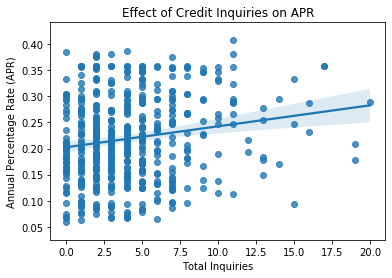

<Figure size 1440x360 with 0 Axes>

In [50]:
sb.regplot(data = loan_samp, x = 'TotalInquiries', y = 'BorrowerAPR')
plt.xlabel('Total Inquiries')
plt.ylabel('Annual Percentage Rate (APR)')
plt.title('Effect of Credit Inquiries on APR')
plt.figure(figsize = [20,5]);

As this a factor that impacts your credit score, we would expect that having to many credit inquiries on your credit report will result in a higher APR.

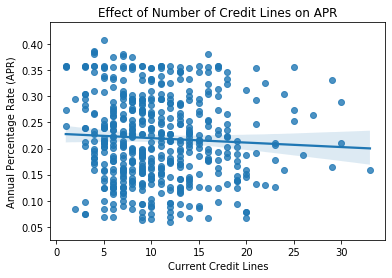

<Figure size 1440x360 with 0 Axes>

In [51]:
sb.regplot(data = loan_samp, x = 'CurrentCreditLines', y = 'BorrowerAPR')
plt.xlabel('Current Credit Lines')
plt.ylabel('Annual Percentage Rate (APR)')
plt.title('Effect of Number of Credit Lines on APR')
plt.figure(figsize = [20,5]);

I didn't expect this to have such a negative relationship, because having many credit lines usually means you're a safe bet for a good borrower. Yet, it seems like there's a limit. Having too many could negatively impact your APR on the loan.

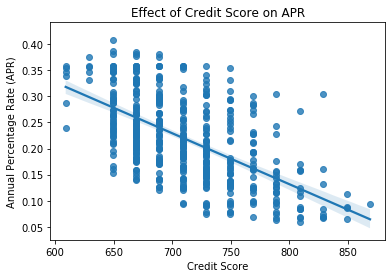

<Figure size 1440x360 with 0 Axes>

In [52]:
sb.regplot(data = loan_samp, x = 'CreditScoreMean', y = 'BorrowerAPR')
plt.xlabel('Credit Score')
plt.ylabel('Annual Percentage Rate (APR)')
plt.title('Effect of Credit Score on APR')
plt.figure(figsize = [20,5]);

This graph looks like it does, because the mean credit scores were calculated from the ranges meaning a lot of people will basically rounded to the closest score. However, we can still see that obviously there is a strong negative correlation between credit score and APR, as the better credit score you have the lower APR you will receive, because you are a safer bet for lenders.

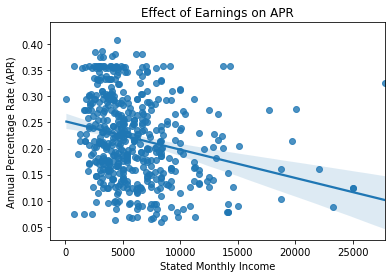

<Figure size 1440x360 with 0 Axes>

In [53]:
sb.regplot(data = loan_samp, x = 'StatedMonthlyIncome', y = 'BorrowerAPR')
plt.xlabel('Stated Monthly Income')
plt.ylabel('Annual Percentage Rate (APR)')
plt.title('Effect of Earnings on APR')
plt.figure(figsize = [20,5]);

I was somewhat surprised to see that monthly income had such a strong relationship with APR, because before doing this research I assumed that yes this would matter, but not almost as much as the credit score. It seems somewhat odd that if someone earned less than another borrower and borrowed less that they would have a higher APR, because in my mind just because you earn more doesn't mean you are a sure bet to fulfill the loan repayment. This will be interesting to look more at.

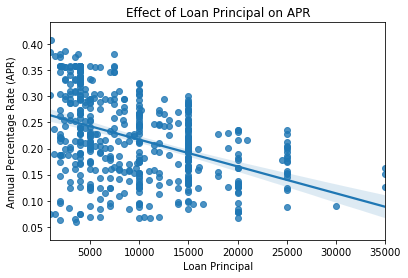

<Figure size 1440x360 with 0 Axes>

In [54]:
sb.regplot(data = loan_samp, x = 'LoanOriginalAmount', y = 'BorrowerAPR')
plt.xlabel('Loan Principal')
plt.ylabel('Annual Percentage Rate (APR)')
plt.title('Effect of Loan Principal on APR')
plt.figure(figsize = [20,5]);

This was probably the most interesting correlation to me, because I never thought that the amount you lend will have such an impact on the APR you receive. I never thought of this as such an impactful factor. Yet, it does seem to incentivize that borrowers borrow more, because in the end it will be the better deal overall.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The most interesting relationship here that was unexpected to me was the relationship between loan prinicipal and the APR. It turns out the larger loan you request the better APR you can get. I wasn't aware of this. I didn't think of this affecting the APR. Your monthly income also really plays a role in the APR you can receive.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The type of loan you receive also affects your APR. It looks like a business loan will give you the lowest APR.  Owning a house will also give you better chances of securing a lower APR.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

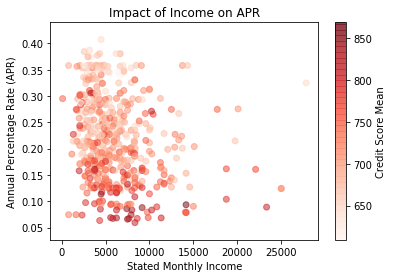

<Figure size 1440x360 with 0 Axes>

In [55]:
plt.scatter(data = loan_samp, x = 'StatedMonthlyIncome', y = 'BorrowerAPR', alpha = .5, c = 'CreditScoreMean', cmap = 'Reds');
plt.colorbar(label = 'Credit Score Mean');
plt.xlabel('Stated Monthly Income')
plt.ylabel('Annual Percentage Rate (APR)')
plt.title('Impact of Income on APR')
plt.figure(figsize = [20,5]);

We can see here a relationship between income and APR. This shows that those with higher incomes will usually receive a lower APR, this is probably due to the fact that may be more likely to fully repay their loans. Yet, I don't think this is always a safe assumption, so it is nevertheless interesting. We can also see here that the credit scores, while most of the good scores are at the lower APR's, it doesn't guarantee a low APR, because as we can see the different shades are spread around a bit. This means there are definitely other factors considered rather than just credit score or mostly all credit score. This also shows that you don't have to earn a lot to have a good credit score, as the highest income plots on this chart are lighter in color and thus have relatively lower credit scores. In fact, this may lead you to believe the more reasonable monthly incomes plots are better living withint their means.

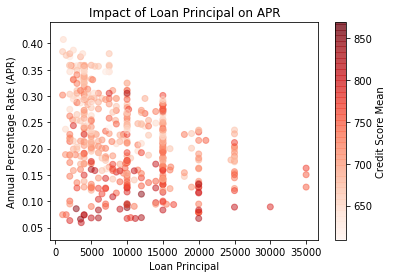

<Figure size 1440x360 with 0 Axes>

In [56]:
plt.scatter(data = loan_samp, x = 'LoanOriginalAmount', y = 'BorrowerAPR', alpha = .5, c = 'CreditScoreMean', cmap = 'Reds');
plt.colorbar(label = 'Credit Score Mean');
plt.xlabel('Loan Principal');
plt.ylabel('Annual Percentage Rate (APR)');
plt.title('Impact of Loan Principal on APR');
plt.figure(figsize = [20,5]);

We can see a relationship between the amount borrowed and the APR. Borrowing more seems to let you lock in a lower APR. This also shows the credit score spread around a bit, meaning once again that credit score and its corresponding factors are not all that's in play here.

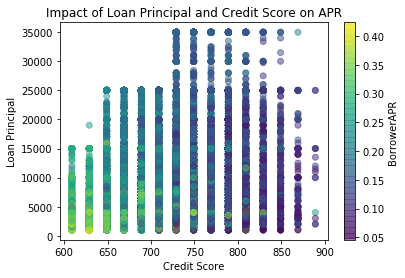

<Figure size 1440x360 with 0 Axes>

In [57]:
plt.scatter(data = loan_data, x = 'CreditScoreMean', y = 'LoanOriginalAmount', alpha = .5, c = 'BorrowerAPR', cmap = 'viridis');
plt.colorbar(label = 'BorrowerAPR');
plt.xlabel('Credit Score');
plt.ylabel('Loan Principal');
plt.title('Impact of Loan Principal and Credit Score on APR');
plt.figure(figsize = [20,5]);

The relationship between the loan principal and APR can be seen more clearly here, as the loan principal increases, there is no yellow or green to be seen. Reinforcing the fact, that APR's are favorable at higher prinicpals.

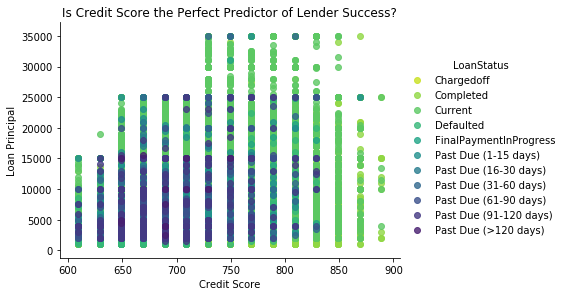

In [58]:
g = sb.FacetGrid(data = loan_data, hue = 'LoanStatus', palette = 'viridis_r', height = 4, aspect = 1.5)
g = g.map(sb.regplot, 'CreditScoreMean', 'LoanOriginalAmount', x_jitter = 0.04, fit_reg = False);
g.add_legend();

plt.xlabel('Credit Score');
plt.ylabel('Loan Principal');
plt.title('Is Credit Score the Perfect Predictor of Lender Success?');

To further prove that credit score is not the only predictor of a lender's sucess, this chart was created. We can see here even at higher credit scores there still plenty of defaulted accounts or accounts late on payments. This would suggest that lenders certainly need to look at things like income, among other factors.

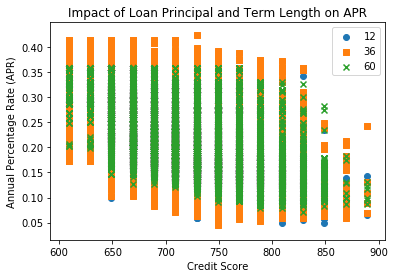

In [59]:
cat_markers = [['12', 'o'],
               ['36', 's'],
               ['60', 'x']]
                

for cat, marker in cat_markers:
    loan_cat = loan_data[loan_data['Term'] == cat]
    plt.scatter(data = loan_cat, x = 'CreditScoreMean', y = 'BorrowerAPR', marker = marker)
plt.legend(['12','36','60']);

plt.xlabel('Credit Score');
plt.ylabel('Annual Percentage Rate (APR)');
plt.title('Impact of Loan Principal and Term Length on APR');

This plot has the different loan terms as shape encodings. This would suggest that borrowers, if they wish to get the best APR possible, should steer away from the longer term of 60 months.

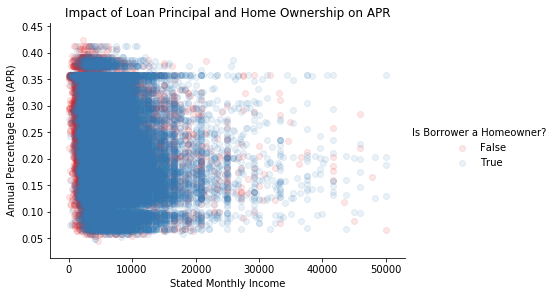

In [60]:
g = sb.FacetGrid(data = loan_data, hue = 'IsBorrowerHomeowner', palette = 'Set1', height = 4, aspect = 1.5)
g = g.map(sb.regplot, 'StatedMonthlyIncome', 'BorrowerAPR', x_jitter = 0.04, fit_reg = False, scatter_kws={'alpha': .1});
g.add_legend(title = 'Is Borrower a Homeowner?');

plt.xlabel('Stated Monthly Income');
plt.ylabel('Annual Percentage Rate (APR)');
plt.title('Impact of Loan Principal and Home Ownership on APR');


While this plot doesn't show a glaringly obvious relationship, we can still see that that the most solid portions of the lower APR levels are very much blue, meaning homeowners. So, owning a home increases the odds of getting a lower APR.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Although most borrowers here are homeowners, this seems to slightly help you get a lower APR. So does, the term length. Not choosing the longest term option will get you a lower APR. Your monthly income and the larger amount you borrow will also help you get a lower APR.

### Were there any interesting or surprising interactions between features?

> No matter your credit score it seems, as long as it's good enough to receive a loan in the first place, it seems that the larger the loan principal the lower the APR. This must be an incentive to take more money in a loan, because the lender can profit more from it. It's also interesting that most larger loans use the 36-month term, instead of the longer term of 60 months. Credit score also doesn't seem to be the perfect predictor of whether or not someone will default on a loan or be late on payments, because we can see higher credit score having borrowers can also be late on payments or even default on their loans.

# What Will Get Me the Best Annual Percentage Rate on My Loan?

> Other than the obvious having a good credit score and the factors that correlate with that, which has proven to not always be a sure bet here, in order to get a lower APR, which is the envy of the lending world, because you will pay less in the end, you should earn a large income, own a home, request a larger loan, more specifically a green loan, and lock in the 36-month term, or the mid-length term option, certainly not the longest term. According to this dataset, these factors will get you the best deal on your loan. 